In [1]:
# Dataset - http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

In [2]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from nltk.tokenize import word_tokenize

In [3]:
newsgroups = fetch_20newsgroups()

In [4]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
type(newsgroups.data), type(newsgroups)

(list, sklearn.utils._bunch.Bunch)

In [6]:
#for i in newsgroups.data[0:5]:
#    print(i)

In [7]:
documents = newsgroups.data
categories = newsgroups.target
documents_modified = [word_tokenize(doc) for doc in documents]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(documents_modified, categories, random_state = 2)

#### Removing stopwords and punctuation and building the vocabulary

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Eshita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
len(stopwords)
#stopwords

179

In [11]:
import string
# Storing the sets of punctuation 
punctuations=list(string.punctuation)
#punctuations

In [12]:
# merging punctuation and stopwords into a set
stopwords.update(punctuations)

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Eshita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
len(stopwords)

211

In [15]:
# adding custom stopwords in a text file and updating the stopwords set
more_stops = np.loadtxt("stops.txt", dtype=str, delimiter=",")
stopwords.update(more_stops)
len(stopwords)
#stopwords

324

In [17]:
# removing the stopwords and building the vocabulary
all_words =[]
for doc in X_train:
    #words = word_tokenize(doc) # tokenize the sentences, can use split() also
    #print(words) 
    for word in doc:
        if(word.lower() not in stopwords and len(word) != 1 and len(word)!=2 and word[0]!= "'" and word!= "n't"):
            all_words.append(word)

In [18]:
all_words

['nancyo',
 'shnext15.ucslabs.sfu.ca',
 'Nancy',
 'Patricia',
 "O'Connor",
 'Subject',
 'POPE',
 'JEWISH',
 'Organization',
 'Simon',
 'Fraser',
 'University',
 'Burnaby',
 'B.C.',
 'Canada',
 'Lines',
 'article',
 '1993Apr15.180024.19308',
 'wam.umd.edu',
 'west',
 'next02cville.wam.umd.edu',
 'Stilgar',
 'writes',
 '+Last',
 'night',
 'watching',
 '2a.m',
 'rebroadcast',
 'Jerry',
 'Springer',
 '+talk',
 'show',
 'heard',
 'Jewel',
 'thought',
 'year',
 'old',
 'racist',
 '+The',
 'focus',
 'show',
 'kids',
 'hatred',
 'Jewish',
 '+religion',
 'stuff',
 'deleted',
 '+Interesting',
 'scary',
 'went',
 'say',
 'Jews',
 '+killed',
 'god',
 'end',
 'time',
 'races',
 '+go',
 'homelands',
 'course',
 'remain',
 'America',
 '+is',
 'New',
 'Jeruselem',
 'says',
 'Gen',
 'another',
 'kid',
 'said',
 '+the',
 'rest',
 'races',
 'home',
 'great',
 'battle',
 'plague',
 '+or',
 'whatever',
 'Revel',
 'says',
 'happen',
 'jews',
 'killed',
 '+The',
 'interesting',
 'thing',
 'roomate',
 'Cathol

In [19]:
len(all_words)

1343515

#### Making frequency dictionary for all words in the document

In [20]:
def freq_dict(word_list):
    dictionary = {}
    for word in all_words:
        if word in dictionary.keys():
            dictionary[word]+=1
        else:
            dictionary[word]=1
    return dictionary

dictionary = freq_dict(all_words)
dictionary

{'nancyo': 1,
 'shnext15.ucslabs.sfu.ca': 1,
 'Nancy': 25,
 'Patricia': 3,
 "O'Connor": 21,
 'Subject': 8837,
 'POPE': 8,
 'JEWISH': 6,
 'Organization': 8219,
 'Simon': 97,
 'Fraser': 37,
 'University': 4144,
 'Burnaby': 24,
 'B.C.': 48,
 'Canada': 523,
 'Lines': 8509,
 'article': 5012,
 '1993Apr15.180024.19308': 1,
 'wam.umd.edu': 39,
 'west': 52,
 'next02cville.wam.umd.edu': 9,
 'Stilgar': 8,
 'writes': 5867,
 '+Last': 1,
 'night': 322,
 'watching': 114,
 '2a.m': 1,
 'rebroadcast': 3,
 'Jerry': 65,
 'Springer': 16,
 '+talk': 1,
 'show': 504,
 'heard': 681,
 'Jewel': 1,
 'thought': 729,
 'year': 1344,
 'old': 773,
 'racist': 43,
 '+The': 4,
 'focus': 73,
 'kids': 165,
 'hatred': 38,
 'Jewish': 373,
 '+religion': 1,
 'stuff': 531,
 'deleted': 279,
 '+Interesting': 1,
 'scary': 29,
 'went': 483,
 'say': 1960,
 'Jews': 627,
 '+killed': 1,
 'god': 226,
 'end': 742,
 'time': 2749,
 'races': 20,
 '+go': 1,
 'homelands': 3,
 'course': 945,
 'remain': 116,
 'America': 266,
 '+is': 1,
 'New': 

In [21]:
sorted_words = sorted(dictionary, key=dictionary.get, reverse=True)
top_3000_words = sorted_words[:3000]
top_3000_frequencies = [dictionary[word] for word in top_3000_words]

top_3000_words

['Subject',
 'Lines',
 'Organization',
 'writes',
 'article',
 'people',
 'University',
 'MAX',
 'know',
 'get',
 'think',
 'use',
 'time',
 'also',
 'good',
 'way',
 'may',
 'even',
 'see',
 'make',
 'say',
 'Distribution',
 'right',
 'Nntp-Posting-Host',
 'new',
 'used',
 'want',
 'God',
 'said',
 'first',
 'system',
 'NNTP-Posting-Host',
 'work',
 'well',
 'need',
 'anyone',
 'problem',
 'something',
 'world',
 'using',
 'believe',
 'going',
 'back',
 'years',
 'find',
 'year',
 'Reply-To',
 'things',
 'must',
 'point',
 'information',
 'better',
 'might',
 'question',
 'take',
 'file',
 'last',
 'got',
 'since',
 'help',
 'number',
 'program',
 'available',
 'made',
 'government',
 'Thanks',
 'without',
 'sure',
 'another',
 'thing',
 'David',
 'etc',
 'Q,3',
 'read',
 'Computer',
 'New',
 'someone',
 'little',
 'drive',
 'part',
 'come',
 'around',
 'data',
 'case',
 'give',
 'version',
 'anything',
 'John',
 'fact',
 'set',
 'different',
 'long',
 'key',
 'course',
 'tell',
 'Jes

In [22]:
len(dictionary.keys())

161356

#### Frequnecy Distribution of words

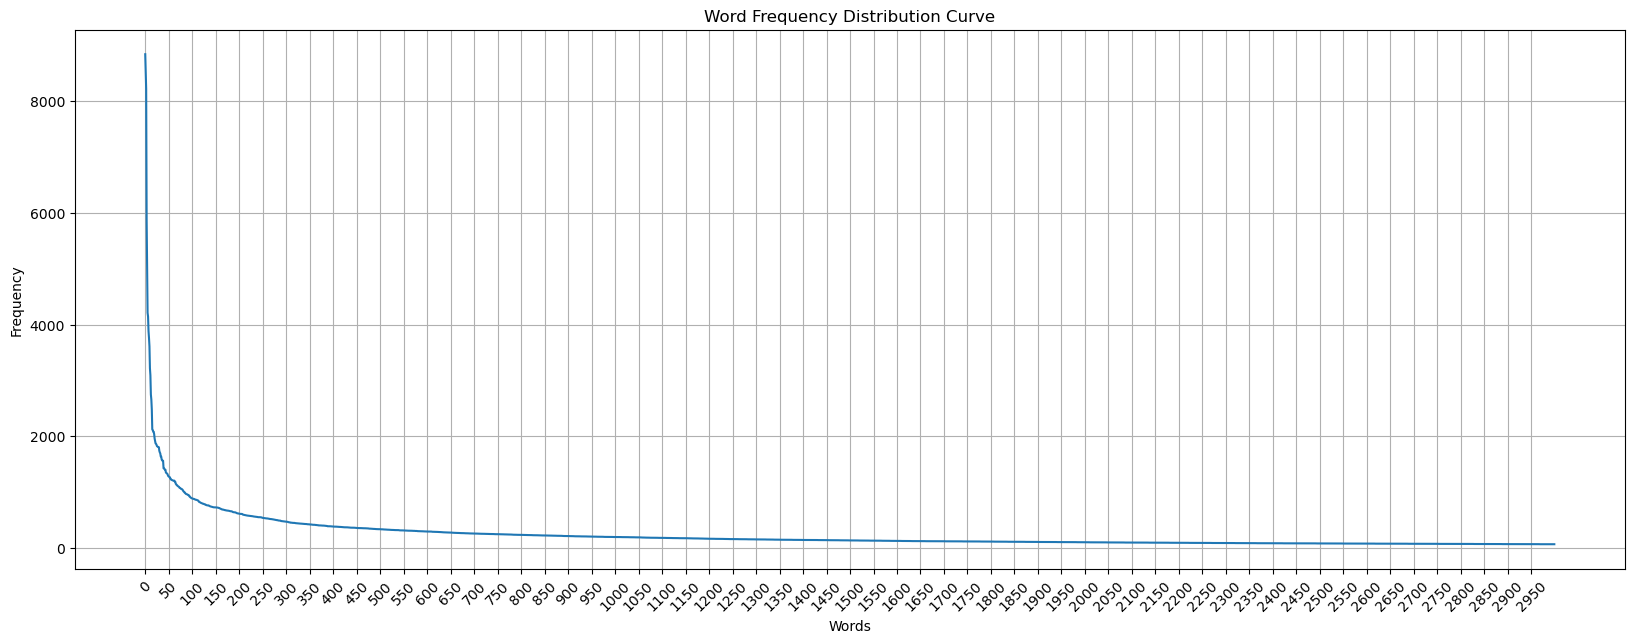

In [23]:
import matplotlib.pyplot as plt

# Plot the frequency distribution curve
plt.figure(figsize=(20,7))

plt.plot(top_3000_frequencies)
plt.xticks(range(0, len(top_3000_frequencies), 50), rotation=45)  # Adjust the step (50) as needed

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution Curve')
plt.grid(True)
#plt.xlim(0,150)
plt.show()

In [24]:
features = sorted_words[20:4000]
features

['say',
 'Distribution',
 'right',
 'Nntp-Posting-Host',
 'new',
 'used',
 'want',
 'God',
 'said',
 'first',
 'system',
 'NNTP-Posting-Host',
 'work',
 'well',
 'need',
 'anyone',
 'problem',
 'something',
 'world',
 'using',
 'believe',
 'going',
 'back',
 'years',
 'find',
 'year',
 'Reply-To',
 'things',
 'must',
 'point',
 'information',
 'better',
 'might',
 'question',
 'take',
 'file',
 'last',
 'got',
 'since',
 'help',
 'number',
 'program',
 'available',
 'made',
 'government',
 'Thanks',
 'without',
 'sure',
 'another',
 'thing',
 'David',
 'etc',
 'Q,3',
 'read',
 'Computer',
 'New',
 'someone',
 'little',
 'drive',
 'part',
 'come',
 'around',
 'data',
 'case',
 'give',
 'version',
 'anything',
 'John',
 'fact',
 'set',
 'different',
 'long',
 'key',
 'course',
 'tell',
 'Jesus',
 'probably',
 'best',
 '1993',
 'Windows',
 'possible',
 'put',
 'seems',
 'day',
 'look',
 'please',
 'run',
 'says',
 'lot',
 'name',
 'car',
 'true',
 'power',
 'far',
 'card',
 'list',
 'line

#### Multinomial Naive Bayes using Sklearn

In [25]:
def convert(X, features):
    modified = np.zeros((len(X), len(features)))
    for i in range(len(X)):
        current_doc = X[i]
    
        for word in current_doc:  # check if the word is in the features list
            if word in features:
                for j in range(len(features)):
                    if features[j] == word: # find the index of the word in features
                        modified[i][j] += 1 # increment the count of word in document i
    return modified

In [27]:
X_train_modified = convert(X_train, features)
X_test_modified= convert(X_test, features)

In [28]:
# # 2D matrix to represent the frequency of each feature(top words) in each document
# training = np.zeros((len(documents), len(features)))

# for i in range(len(documents)):
#     current_doc = word_tokenize(documents[i])
    
#     for word in current_doc:  # check if the word is in the features list
#         if word in features:
#             for j in range(len(features)):
#                 if features[j] == word: # find the index of the word in features
#                     training[i][j] += 1 # increment the count of word in document i

In [29]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

clf.fit(X_train_modified, Y_train)
Y_pred = clf.predict(X_test_modified)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       141
           1       0.59      0.83      0.69       145
           2       0.96      0.50      0.66       141
           3       0.62      0.71      0.66       136
           4       0.71      0.74      0.73       128
           5       0.83      0.82      0.83       136
           6       0.73      0.81      0.77       151
           7       0.76      0.77      0.76       145
           8       0.85      0.87      0.86       157
           9       0.92      0.94      0.93       161
          10       0.96      0.91      0.94       145
          11       0.93      0.91      0.92       141
          12       0.76      0.71      0.73       138
          13       0.91      0.91      0.91       139
          14       0.94      0.88      0.91       156
          15       0.89      0.91      0.90       167
          16       0.82      0.91      0.87       128
          17       0.96    

In [31]:
print(accuracy_score(Y_test, Y_pred)*100)

82.29056203605515


#### Multinomial Naive Bayes Implementation

In [32]:
# fit function takes the training data and returns a dictionary whose keys are the different classes available to classify.
# for each key, value is another dictionary, whose keys are all the features available to us and value corresponding 
# to each key is sum of all the row of training data corresponding to the current class.
def fit(X_train, Y_train):
    count = {}
    for i in range(1,20):
        docs = X_train[Y_train == i] # documents corresponding to the class i
        count[i] = {}
        count[i]['total'] = 0 #total number of words in class i
        for j in range(len(features)):
            count[i][features[j]] = docs[:, j].sum()
            count[i]['total'] += count[i][features[j]] # sum of all the values of ith key
    return count

In [33]:
def predict(X_test, dic):
    Y_pred=[]
    for doc in X_test: #iterating each document in testing data.
        Y_pred.append(predict_single(dic, doc))
    return Y_pred

In [34]:
def predict_single(dic, x):
    classes = dictionary.keys()
    
    best_p = -1000
    best_class = -1
    first_run = True
    
    for current_class in classes:
        if (current_class == "total_data"):
            continue
            
        p_current_class = probability(dic, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        
        first_run = False
    return best_class

In [35]:
def probability(dictionary, x, current_class):
    output = [] 
    
    for i in range(len(x)):
        if x[i] != 0: # skip features whose value in document is zero
            numerator = np.log(dictionary[current_class][features[i]] + 1) 
            denominator = np.log(dictionary[current_class]['total'] + len(x))
           
            prob = numerator/denominator
            output.append(prob)
    return sum(output)

In [36]:
dictionary=fit(X_train_modified, Y_train)

In [37]:
Y_pred = predict(X_test_modified, dictionary)

In [38]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.66      0.58      0.62       145
           2       0.92      0.42      0.58       141
           3       0.66      0.64      0.65       136
           4       0.76      0.59      0.67       128
           5       0.54      0.91      0.68       136
           6       0.86      0.50      0.64       151
           7       0.74      0.68      0.71       145
           8       0.96      0.59      0.73       157
           9       0.96      0.79      0.87       161
          10       0.90      0.94      0.92       145
          11       0.42      0.99      0.59       141
          12       0.83      0.51      0.63       138
          13       0.88      0.88      0.88       139
          14       0.87      0.87      0.87       156
          15       0.56      0.95      0.70       167
          16       0.63      0.85      0.73       128
          17       0.59    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(accuracy_score(Y_test, Y_pred)*100)

69.17638741604807
